In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
from itertools import cycle

from relaxation import relaxation
from steepest_ascent import steepest_ascent
from newton import newton
from conjugate_gradients import conjugate_gradients
from broyden import broyden

cycol = cycle('bgrm')

In [2]:
def f(x1, x2):
    return -31 * x1 ** 2  - 34 * x2 ** 2 + 4 * x1 * x2 + 286 * x1 + 388 * x2

In [3]:
def f2(x):
    return -31 * x[0] ** 2  - 34 * x[1] ** 2 + 4 * x[0] * x[1] + 286 * x[0] + 388 * x[1]

In [4]:
f(5,6), f2([5, 6])

(1879, 1879)

In [5]:
X0 = np.array([[0, 0],
               [1, 8],
               [6, 5],
               [10, 10]])

In [6]:
x1_sym = Symbol('x1')
x2_sym = Symbol('x2')
symbs = [x1_sym, x2_sym]

In [7]:
y_expr = -31 * x1_sym ** 2 - 34 * x2_sym ** 2 + 4 * x1_sym * x2_sym + 286 * x1_sym + 388 * x2_sym

In [8]:
y_expr.subs({x1_sym: 1, x2_sym: 1})

613

In [9]:
def draw_contours(x=(-2, 12), y=(-2, 12), contours_num=10):
    delta = 0.1
    x = np.arange(x[0], x[1], delta)
    y = np.arange(y[0], y[1], delta)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
    fig = plt.figure(figsize=(5, 5), dpi=120)
    CS = plt.contour(X, Y, Z, contours_num)
    plt.clabel(CS, fontsize=9, inline=1)

In [10]:
def draw_paths(paths):
    for path in paths:
        c = next(cycol)
        plt.scatter(path[0][0], path[0][1], marker='x', c=c, zorder=2)
        for i in range(len(path)-1):
            x1, y1 = path[i]
            x2, y2 = path[i+1]
            plt.plot([x1, x2], [y1, y2], c=c, alpha=0.8)

In [11]:
def save_paths(paths, method):
    i = 1
    for path in paths:
        df = pd.DataFrame(path, columns=['x1', 'x2'])
        df['f'] = f(df.x1, df.x2)
        df.to_csv('../data/' + method + '_' + str(i) + '.csv', index=False)
        i += 1

In [12]:
def find_paths(method, X0):
    return [method(y_expr, f2, symbs, x0, 10) for x0 in X0]

## Метод релаксации

In [13]:
paths = find_paths(relaxation, X0)

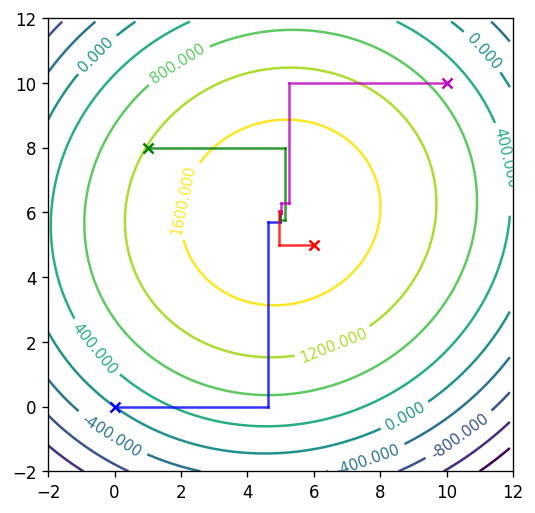

In [14]:
draw_contours()
draw_paths(paths)
plt.xlim((-2,12))
plt.ylim((-2,12))
plt.savefig('../pics/relaxation', bbox_inches='tight')
plt.show()

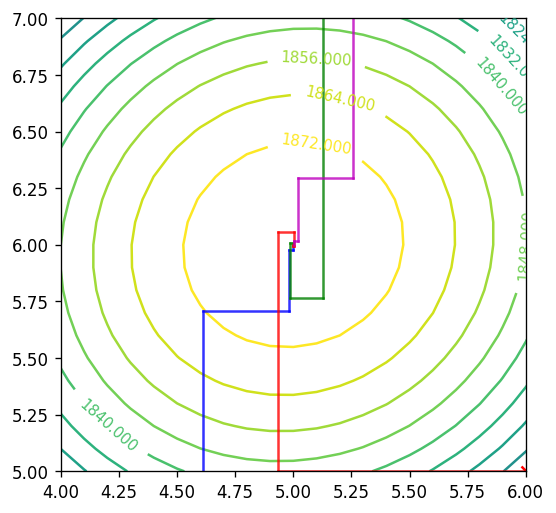

In [15]:
draw_contours((4,6.5), (5,7.5), 15)
draw_paths(paths)
plt.xlim((4,6))
plt.ylim((5,7))
plt.savefig('../pics/relaxation_zoom', bbox_inches='tight')
plt.show()

In [16]:
save_paths(paths, 'relaxation')

## Метод наискорейшего подъема

In [17]:
paths = find_paths(steepest_ascent, X0)

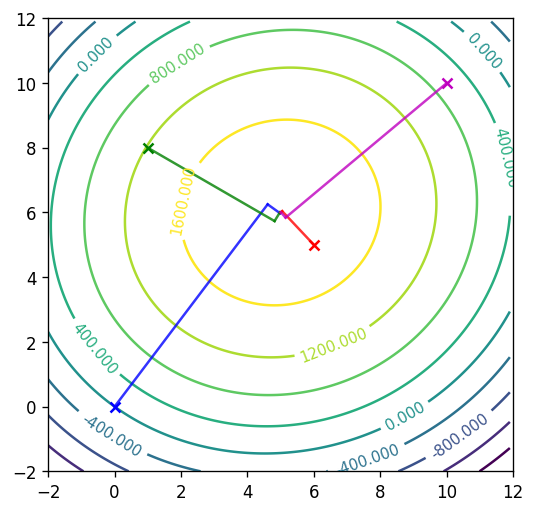

In [18]:
draw_contours()
draw_paths(paths)
plt.xlim((-2,12))
plt.ylim((-2,12))
plt.savefig('../pics/steepest_ascent', bbox_inches='tight')
plt.show()

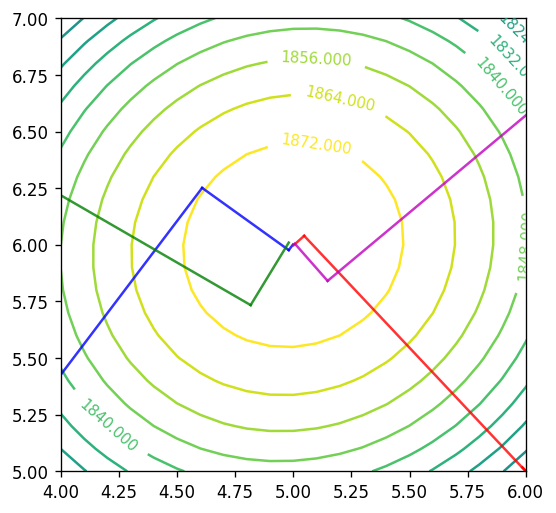

In [19]:
draw_contours((4,6.5), (5,7.5), 15)
draw_paths(paths)
plt.xlim((4,6))
plt.ylim((5,7))
plt.savefig('../pics/steepest_ascent_zoom', bbox_inches='tight')
plt.show()

In [20]:
save_paths(paths, 'steepest_ascent')

## Метод Ньютона

In [21]:
paths = find_paths(newton, X0)

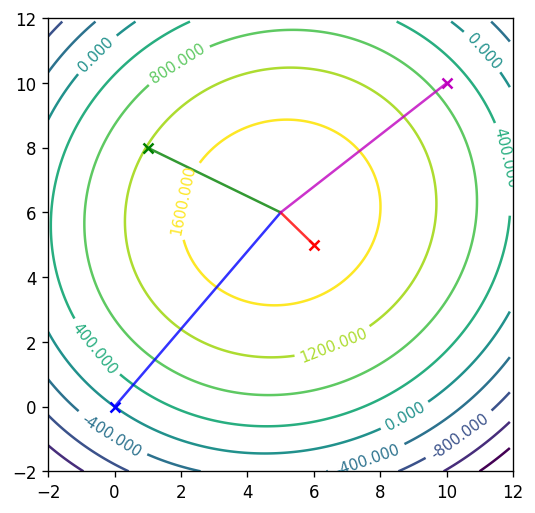

In [22]:
draw_contours()
draw_paths(paths)
plt.xlim((-2,12))
plt.ylim((-2,12))
plt.savefig('../pics/newton', bbox_inches='tight')
plt.show()

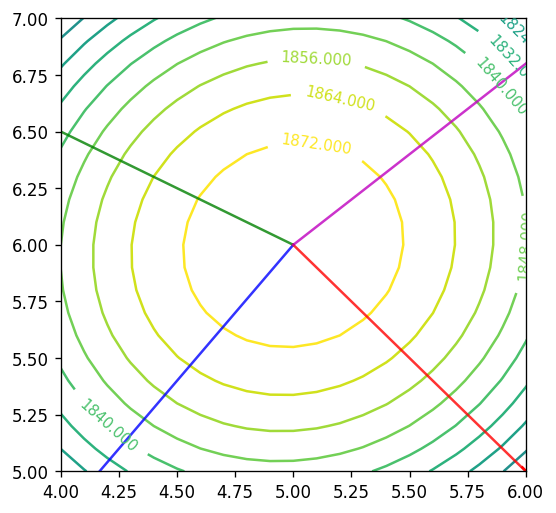

In [23]:
draw_contours((4,6.5), (5,7.5), 15)
draw_paths(paths)
plt.xlim((4,6))
plt.ylim((5,7))
plt.savefig('../pics/newton_zoom', bbox_inches='tight')
plt.show()

In [24]:
save_paths(paths, 'newton')

## Метод сопряженных градиентов

In [25]:
paths = find_paths(conjugate_gradients, X0)

In [26]:
paths[0]

[array([ 0.,  0.], dtype=float32),
 array([ 4.60793877,  6.25132942], dtype=float32),
 array([ 5.00166893,  5.99893045], dtype=float32)]

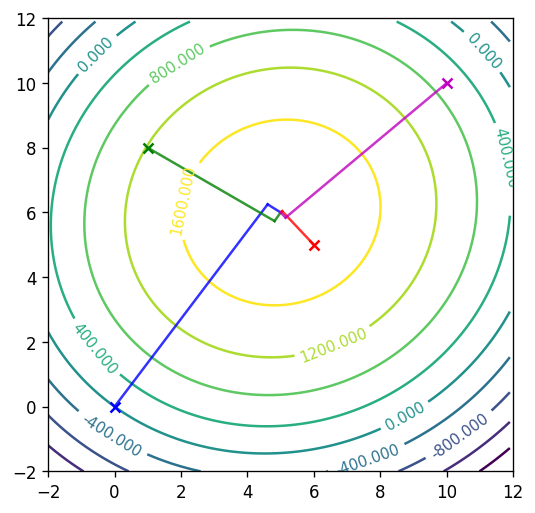

In [27]:
draw_contours()
draw_paths(paths)
plt.xlim((-2,12))
plt.ylim((-2,12))
plt.savefig('../pics/conjugate_gradients', bbox_inches='tight')
plt.show()

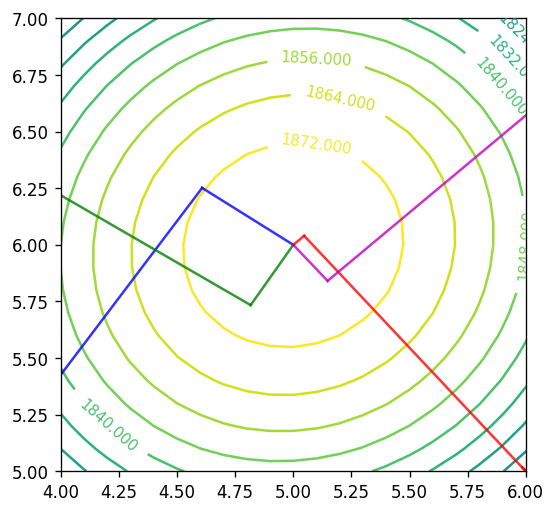

In [28]:
draw_contours((4,6.5), (5,7.5), 15)
draw_paths(paths)
plt.xlim((4,6))
plt.ylim((5,7))
plt.savefig('../pics/conjugate_gradients_zoom', bbox_inches='tight')
plt.show()

In [29]:
save_paths(paths, 'conjugate_gradients')

## Метод Бройдена

In [30]:
paths = find_paths(broyden, X0)

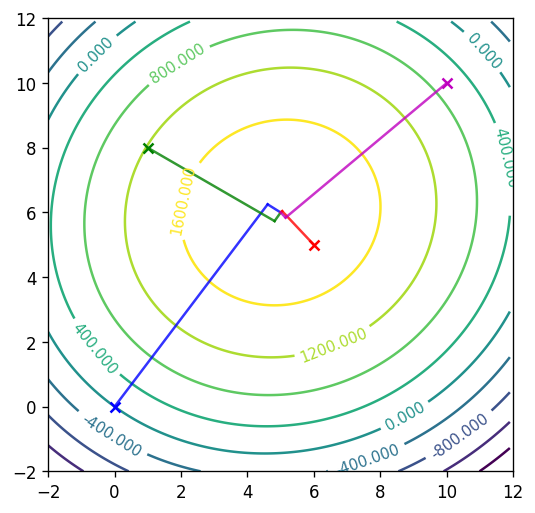

In [31]:
draw_contours()
draw_paths(paths)
plt.xlim((-2,12))
plt.ylim((-2,12))
plt.savefig('../pics/broyden', bbox_inches='tight')
plt.show()

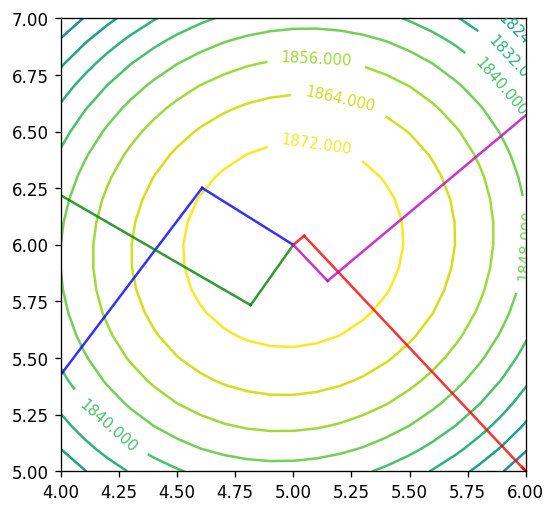

In [32]:
draw_contours((4,6.5), (5,7.5), 15)
draw_paths(paths)
plt.xlim((4,6))
plt.ylim((5,7))
plt.savefig('../pics/broyden_zoom', bbox_inches='tight')
plt.show()

In [33]:
save_paths(paths, 'broyden')